In [68]:
import pandas as pd
from os import path
from tqdm import tqdm
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
np.random.seed(5)

In [283]:
kaggle_movies_df = pd.read_csv('https://raw.githubusercontent.com/sahildit/IMDB-Movies-Extensive-Dataset-Analysis/master/data1/IMDb%20movies.csv', sep=',', encoding='utf-8')

/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [284]:
kaggle_movies_df = kaggle_movies_df.dropna(subset=['description'])

kaggle_movies_df = kaggle_movies_df[['imdb_title_id', 'title', 'original_title', 'description', 'genre', 'year']]
kaggle_movies_df['genres_list'] = kaggle_movies_df['genre'].str.split(", ")
kaggle_movies_df['first_genre'] = kaggle_movies_df.genres_list.apply(lambda x: x[0])


In [285]:
kaggle_movies_df

,imdb_title_id,title,original_title,description,genre,year,genres_list,first_genre
0,tt0000009,Miss Jerry,Miss Jerry,The adventures of a female reporter in the 1890s.,Romance,1894,[Romance],Romance
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,True story of notorious Australian outlaw Ned ...,"Biography, Crime, Drama",1906,"[Biography, Crime, Drama]",Biography
2,tt0001892,Den sorte drøm,Den sorte drøm,Two men of high rank are both wooing the beaut...,Drama,1911,[Drama],Drama
3,tt0002101,Cleopatra,Cleopatra,The fabled queen of Egypt's affair with Roman ...,"Drama, History",1912,"[Drama, History]",Drama
4,tt0002130,L'Inferno,L'Inferno,Loosely adapted from Dante's Divine Comedy and...,"Adventure, Drama, Fantasy",1911,"[Adventure, Drama, Fantasy]",Adventure
...,...,...,...,...,...,...,...,...
85848,tt9905462,Pengalila,Pengalila,An unusual bond between a sixty year old Dalit...,Drama,2019,[Drama],Drama
85849,tt9906644,Manoharam,Manoharam,Manoharan is a poster artist struggling to fin...,"Comedy, Drama",2019,"[Comedy, Drama]",Comedy
85850,tt9908390,Le lion,Le lion,A psychiatric hospital patient pretends to be ...,Comedy,2020,[Comedy],Comedy
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,A middle-aged veterinary surgeon believes his ...,"Comedy, Drama",2020,"[Comedy, Drama]",Comedy


In [286]:
title_ids_grouped_by_year = kaggle_movies_df.groupby('year').imdb_title_id.apply(list)

In [287]:
title_ids_grouped_by_year

year
1894                                                   [tt0000009]
1906                                                   [tt0000574]
1911             [tt0001892, tt0002130, tt0191323, tt0194248, t...
1912             [tt0002101, tt0002199, tt0002452, tt0002461, t...
1913             [tt0002445, tt0002646, tt0002844, tt0003014, t...
                                       ...                        
2017             [tt2226597, tt2238758, tt2239822, tt2241475, t...
2018             [tt2226440, tt2231461, tt2233979, tt2237324, t...
2019             [tt2257284, tt2274648, tt2275629, tt2275743, t...
2020             [tt2420124, tt2573372, tt2702920, tt2819446, t...
TV Movie 2019                                          [tt8206668]
Name: imdb_title_id, Length: 168, dtype: object

In [288]:
def define_paths_to_imgs_kaggle(data, path_to_folder="./Poster/"):

    list_of_available_posters = []
    for y, t in tqdm(data.iteritems(), total=len(data)):

        for id_ in t:
            if path.exists(path.join(path_to_folder, f"{y}/{id_}/{id_}.jpg")):
                list_of_available_posters.append({'imdb_title_id': id_, 'img_path': path.join(path_to_folder, f"{y}/{id_}/{id_}.jpg")})
    img_paths_df = pd.DataFrame(list_of_available_posters)
    return img_paths_df


In [289]:
img_paths_df = define_paths_to_imgs_kaggle(title_ids_grouped_by_year)

100%|██████████| 168/168 [00:18<00:00,  9.12it/s]


In [290]:
img_paths_df

,imdb_title_id,img_path
0,tt0000574,./Poster/1906/tt0000574/tt0000574.jpg
1,tt0002130,./Poster/1911/tt0002130/tt0002130.jpg
2,tt0002101,./Poster/1912/tt0002101/tt0002101.jpg
3,tt0002461,./Poster/1912/tt0002461/tt0002461.jpg
4,tt0002844,./Poster/1913/tt0002844/tt0002844.jpg
...,...,...
29808,tt8580274,./Poster/2020/tt8580274/tt8580274.jpg
29809,tt8850222,./Poster/2020/tt8850222/tt8850222.jpg
29810,tt9484998,./Poster/2020/tt9484998/tt9484998.jpg
29811,tt9777644,./Poster/2020/tt9777644/tt9777644.jpg


In [291]:
kaggle_preprocessed = pd.merge(left=kaggle_movies_df, right=img_paths_df, on='imdb_title_id', how='inner')

In [292]:
kaggle_preprocessed

,imdb_title_id,title,original_title,description,genre,year,genres_list,first_genre,img_path
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,True story of notorious Australian outlaw Ned ...,"Biography, Crime, Drama",1906,"[Biography, Crime, Drama]",Biography,./Poster/1906/tt0000574/tt0000574.jpg
1,tt0002101,Cleopatra,Cleopatra,The fabled queen of Egypt's affair with Roman ...,"Drama, History",1912,"[Drama, History]",Drama,./Poster/1912/tt0002101/tt0002101.jpg
2,tt0002130,L'Inferno,L'Inferno,Loosely adapted from Dante's Divine Comedy and...,"Adventure, Drama, Fantasy",1911,"[Adventure, Drama, Fantasy]",Adventure,./Poster/1911/tt0002130/tt0002130.jpg
3,tt0002461,Richard III,Richard III,Richard of Gloucester uses manipulation and mu...,Drama,1912,[Drama],Drama,./Poster/1912/tt0002461/tt0002461.jpg
4,tt0002844,Fantômas - À l'ombre de la guillotine,Fantômas - À l'ombre de la guillotine,Inspector Juve is tasked to investigate and ca...,"Crime, Drama",1913,"[Crime, Drama]",Crime,./Poster/1913/tt0002844/tt0002844.jpg
...,...,...,...,...,...,...,...,...,...
29808,tt8850222,Peninsula,Train to Busan 2,Sequel to the 2016 South Korean zombie film,"Action, Horror, Thriller",2020,"[Action, Horror, Thriller]",Action,./Poster/2020/tt8850222/tt8850222.jpg
29809,tt8946378,Cena con delitto - Knives Out,Knives Out,A detective investigates the death of a patria...,"Comedy, Crime, Drama",2019,"[Comedy, Crime, Drama]",Comedy,./Poster/2019/tt8946378/tt8946378.jpg
29810,tt9484998,Palm Springs,Palm Springs,When carefree Nyles and reluctant maid of hono...,"Comedy, Fantasy, Mystery",2020,"[Comedy, Fantasy, Mystery]",Comedy,./Poster/2020/tt9484998/tt9484998.jpg
29811,tt9777644,Da 5 Bloods - Come fratelli,Da 5 Bloods,Four African American vets battle the forces o...,"Adventure, Drama, War",2020,"[Adventure, Drama, War]",Adventure,./Poster/2020/tt9777644/tt9777644.jpg


In [313]:
manually_parsed = pd.read_csv('./our_data/manually_parsed_movies.csv')

In [314]:
manually_parsed = manually_parsed.rename({'id': 'imdb_title_id', 'plot': 'description', 'genre': 'first_genre', 'image': 'img_path'}, axis=1)

In [315]:
manually_parsed = manually_parsed.drop_duplicates()

In [316]:
manually_parsed

,imdb_title_id,img_path,title,first_genre,description
0,tt9592704,https://m.media-amazon.com/images/M/MV5BNWMwNm...,Supernoobs,Fantasy,Zen and Mem are experiencing their second snow...
1,tt9570536,https://m.media-amazon.com/images/M/MV5BNmJmNj...,Supernoobs,Fantasy,The Noobs crash land the Galacticus on a stran...
2,tt9570404,https://m.media-amazon.com/images/M/MV5BNjU2OD...,Supernoobs,Fantasy,Power's out in Cornbury. The Noobs just want t...
3,tt9570394,https://m.media-amazon.com/images/M/MV5BMjA3YT...,Supernoobs,Fantasy,The Noobs are given super underwater suits. Th...
4,tt9570280,https://m.media-amazon.com/images/M/MV5BODU2ZG...,Supernoobs,Fantasy,Mem and Zen fall under scrutiny from the Benev...
...,...,...,...,...,...
5264,tt4625048,https://m.media-amazon.com/images/M/MV5BMTgzOT...,Daredevil,Superhero,"In the void left by Fisk's removal, a new thre..."
5265,tt4586672,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,Superseven Unchained,Superhero,T.H.E.Y. has programmed Sandra West to become ...
5266,tt4012658,https://m.media-amazon.com/images/M/MV5BYTNlYz...,Comic Splash: The web-series,Superhero,Tyler Simpson hosts an online TV show satirica...
5267,tt3179670,https://m.media-amazon.com/images/M/MV5BMGY5ZD...,The Sentry,Superhero,"Bob Reynolds, a recovered alcoholic teetering ..."


In [317]:
def define_paths_to_imgs_custom(data, path_to_folder="./db_posters/"):

    list_of_available_posters = []
    for _, t in tqdm(data[['imdb_title_id']].iterrows(), total=len(data[['imdb_title_id']])):
  
      if path.exists(path.join(path_to_folder, f"{t.imdb_title_id}.jpg")):
          list_of_available_posters.append({'imdb_title_id': t.imdb_title_id, 'img_path': path.join(path_to_folder, f"{t.imdb_title_id}.jpg")})

    img_paths_df = pd.DataFrame(list_of_available_posters)
    return img_paths_df


In [318]:
custom_img_paths_df = define_paths_to_imgs_custom(manually_parsed)

100%|██████████| 4913/4913 [00:00<00:00, 14716.89it/s]


In [319]:
custom_img_paths_df

,imdb_title_id,img_path
0,tt15498166,./db_posters/tt15498166.jpg
1,tt10233448,./db_posters/tt10233448.jpg
2,tt1100089,./db_posters/tt1100089.jpg
3,tt0106611,./db_posters/tt0106611.jpg
4,tt1057500,./db_posters/tt1057500.jpg
...,...,...
580,tt5215750,./db_posters/tt5215750.jpg
581,tt4586672,./db_posters/tt4586672.jpg
582,tt4012658,./db_posters/tt4012658.jpg
583,tt3179670,./db_posters/tt3179670.jpg


In [320]:
manually_parsed = manually_parsed.drop(['img_path'], axis=1)

In [321]:
custom_preprocessed = pd.merge(left=manually_parsed, right=custom_img_paths_df, on='imdb_title_id', how='inner')

In [322]:
custom_preprocessed = custom_preprocessed.drop_duplicates('imdb_title_id')

In [323]:
custom_preprocessed.first_genre.value_counts()

Superhero    207
Sport        124
Animation     99
Crime         37
Fantasy       34
Biography     10
History        4
Music          4
Name: first_genre, dtype: int64

In [324]:
final_dataset = pd.concat([kaggle_preprocessed[['imdb_title_id', 'img_path', 'title', 'first_genre', 'description']], custom_preprocessed], axis=0, ignore_index=True)
final_dataset = final_dataset[~final_dataset.first_genre.isin(['Adult'])]

In [325]:
final_dataset

,imdb_title_id,img_path,title,first_genre,description
0,tt0000574,./Poster/1906/tt0000574/tt0000574.jpg,The Story of the Kelly Gang,Biography,True story of notorious Australian outlaw Ned ...
1,tt0002101,./Poster/1912/tt0002101/tt0002101.jpg,Cleopatra,Drama,The fabled queen of Egypt's affair with Roman ...
2,tt0002130,./Poster/1911/tt0002130/tt0002130.jpg,L'Inferno,Adventure,Loosely adapted from Dante's Divine Comedy and...
3,tt0002461,./Poster/1912/tt0002461/tt0002461.jpg,Richard III,Drama,Richard of Gloucester uses manipulation and mu...
4,tt0002844,./Poster/1913/tt0002844/tt0002844.jpg,Fantômas - À l'ombre de la guillotine,Crime,Inspector Juve is tasked to investigate and ca...
...,...,...,...,...,...
30327,tt5215750,./db_posters/tt5215750.jpg,The Flash,Superhero,"Zoom unleashes an army of Earth-2 meta-humans,..."
30328,tt4586672,./db_posters/tt4586672.jpg,Superseven Unchained,Superhero,T.H.E.Y. has programmed Sandra West to become ...
30329,tt4012658,./db_posters/tt4012658.jpg,Comic Splash: The web-series,Superhero,Tyler Simpson hosts an online TV show satirica...
30330,tt3179670,./db_posters/tt3179670.jpg,The Sentry,Superhero,"Bob Reynolds, a recovered alcoholic teetering ..."


In [326]:
final_dataset.first_genre.value_counts()

Comedy         8522
Drama          7757
Action         4920
Crime          2288
Horror         1634
Adventure      1498
Animation      1052
Biography       990
Thriller        234
Fantasy         210
Superhero       207
Western         191
Mystery         167
Romance         144
Sport           127
Family          124
Sci-Fi          107
Musical          71
War              27
Music            24
History          19
Film-Noir        18
Documentary       1
Name: first_genre, dtype: int64

In [327]:
list_of_dfs = []
for genre in final_dataset.first_genre.value_counts().index:
    df = final_dataset[final_dataset['first_genre']==genre]
    if len(df) >= 200:
        list_of_dfs.append(df.sample(200))
    else:
        list_of_dfs.append(df)

In [328]:
each_genre200 = pd.concat(list_of_dfs, axis=0, ignore_index=True)

In [329]:
each_genre200.first_genre.value_counts()

Comedy         200
Drama          200
Action         200
Crime          200
Horror         200
Adventure      200
Animation      200
Biography      200
Thriller       200
Fantasy        200
Superhero      200
Western        191
Mystery        167
Romance        144
Sport          127
Family         124
Sci-Fi         107
Musical         71
War             27
Music           24
History         19
Film-Noir       18
Documentary      1
Name: first_genre, dtype: int64

In [333]:
each_genre200 = each_genre200[~(each_genre200.first_genre=='Documentary')]

In [334]:
each_genre200.to_csv("./our_data/each_genre200.csv", index=False)

In [5]:
each_genre200 = pd.read_csv("./our_data/each_genre200.csv")

In [6]:
each_genre200

,imdb_title_id,img_path,title,first_genre,description
0,tt0119863,./Poster/1997/tt0119863/tt0119863.jpg,Le pari,Comedy,"Deux beaux-frères, Didier et Bernard se lancen..."
1,tt0959306,./Poster/2014/tt0959306/tt0959306.jpg,Reach Me - La strada per il successo,Comedy,A self-help book changes the lives of differen...
2,tt0094921,./Poster/1988/tt0094921/tt0094921.jpg,Dall'altro lato della strada,Comedy,A Manhattan single meets a man through her Jew...
3,tt0061495,./Poster/1967/tt0061495/tt0061495.jpg,La collezionista,Comedy,A womanizing art dealer and a painter find the...
4,tt0083833,./Poster/1982/tt0083833/tt0083833.jpg,A cena con gli amici,Comedy,A group of college-age buddies struggle with t...
...,...,...,...,...,...
3214,tt0043251,./Poster/1951/tt0043251/tt0043251.jpg,La penna rossa,Film-Noir,Respectable citizens receive anonymous letters...
3215,tt0045205,./Poster/1952/tt0045205/tt0045205.jpg,So che mi ucciderai,Film-Noir,After an ambitious actor insinuates himself in...
3216,tt0046126,./Poster/1953/tt0046126/tt0046126.jpg,Niagara,Film-Noir,"As two couples are visiting Niagara Falls, ten..."
3217,tt0047976,./Poster/1955/tt0047976/tt0047976.jpg,Dementia,Film-Noir,"This film, with no dialogue at all, follows a ..."


## Fine tuning

In [15]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, Concatenate, MaxPooling2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D

from keras import Model, optimizers
from keras.applications import xception
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle


class PosterSequence(keras.utils.Sequence):
    
    def __init__(self, batch_size, img_size, images_paths, labels):
        self.batch_size = batch_size
        self.img_size = img_size
        self.images_paths = images_paths
        self.labels = labels
        self.num_classes = len(set(self.labels))
    
    def __len__(self):
        length = len(self.images_paths) // self.batch_size
        return length
    
    def __getitem__(self, idx):
        x = np.zeros((self.batch_size, ) + self.img_size + (3, ), dtype="float32")
        y = np.zeros((self.batch_size, ) + (self.num_classes, ), dtype="uint8")
        """
        This method returns the batches themselves including images (x) and masks (y) as np.array
            img / 255.0 for images, so that each value is adjacent to the interval [0, 1]
        """
        
        batch_x = self.images_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        x = np.array([keras.preprocessing.image.img_to_array(load_img(file_name, color_mode='rgb', target_size=self.img_size, interpolation='nearest', keep_aspect_ratio=False), dtype="float32") / 255.0 for file_name in batch_x])
        y = np.array([to_categorical(label, num_classes=self.num_classes) for label in batch_y])
        return x, y 

In [8]:
le = preprocessing.LabelEncoder()
le.fit(each_genre200['first_genre'])
each_genre200['genre_encoded'] = le.transform(each_genre200['first_genre'])

In [41]:
# X_train, X_test, y_train, y_test = train_test_split(each_genre200.img_path.values, each_genre200.genre_encoded.values, test_size=0.10, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
X_train = each_genre200.img_path.values
y_train = each_genre200.genre_encoded.values
image_size = (200, 150)
b_size = len(X_train)# 128
train_gen = PosterSequence(b_size, image_size, X_train, y_train)
# val_gen = PosterSequence(b_size, image_size, X_val, y_val)

In [42]:
path_to_gdrive = "./"
keras.backend.clear_session()


base_model = tf.keras.applications.MobileNetV2(input_shape=image_size+(3, ),
                                                  include_top=False,
                                                  weights='imagenet')


In [32]:
train_gen.__getitem__(0)[0][0].shape

(200, 150, 3)

In [43]:
prediction = base_model.predict(train_gen)

1/1 [==============================] - 19s 19s/step


In [45]:
np.save('extracted_feature.npy', prediction)

In [44]:
prediction.shape# .flatten().shape

(3219, 7, 5, 1280)

In [46]:
prediction_reshaped  = prediction.reshape(len(X_train), -1)

In [47]:
prediction_reshaped.shape

(3219, 44800)

In [48]:
np.save('extracted_feature.npy', prediction_reshaped)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='full')
comps = pca.fit(prediction_reshaped)

In [51]:
comps = comps.transform(prediction_reshaped)

In [53]:
comps.shape

(3219, 150)

In [55]:
pca_features = pd.concat([pd.DataFrame(comps), pd.DataFrame(y_train, columns=['label'])], axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(pca_features.drop('label', axis=1), pca_features.label.values, test_size=0.10, random_state=42, shuffle=True)

In [61]:
#Fit Logistic Regression model:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)


/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:

labels = pca_features['label'].value_counts().index

In [63]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=labels)


In [64]:
cm_df = pd.DataFrame(cm, index = labels, columns = labels)


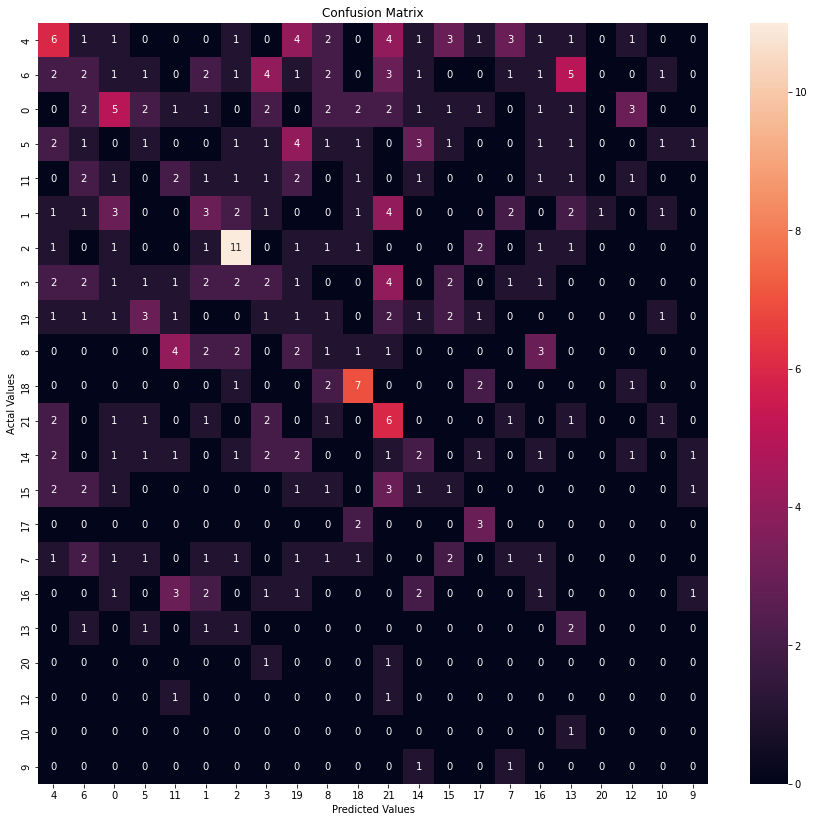

In [69]:
#Plotting the confusion matrix
plt.figure(figsize=(15,14))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = lr.predict_proba(X_test)

# Calculate ROC_AUC
roc_auc = roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
  )

In [71]:
roc_auc

0.7078504064786316

In [54]:
from tensorflow.keras.preprocessing.image import load_img

2022-11-25 17:29:42.277345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
import os

In [312]:
from PIL import Image
for filename in final_dataset.img_path.values:# os.listdir('./db_posters/'):
    if filename.endswith('.jpg'):
        try:
            img = Image.open(filename)  # open the image file
            img.verify()  # verify that it is, in fact an image
            load_img(filename, color_mode='rgb', target_size=(200, 150), interpolation='nearest', keep_aspect_ratio=False)
        except (IOError, OSError, SyntaxError) as e:
            print(filename)
            os.remove(filename)
            pass
            

./db_posters/tt0149460.jpg
./db_posters/tt11680642.jpg
./db_posters/tt14298658.jpg
./db_posters/tt0448694.jpg
./db_posters/tt3032476.jpg
./db_posters/tt11291274.jpg
./db_posters/tt7286456.jpg


/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/PIL/Image.py:3011: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


./db_posters/tt8367814.jpg
./db_posters/tt15255876.jpg


In [280]:
each_genre200.img_path.isna().sum()

0